In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [16]:
mnist.target = mnist.target.astype(np.int8)
print(mnist.data.dtype, mnist.target.dtype)

float64 int8


In [23]:
reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
mnist.data[:60000] = mnist.data[reorder_train]
mnist.target[:60000] = mnist.target[reorder_train]
mnist.data[60000:] = mnist.data[reorder_test + 60000]
mnist.target[60000:] = mnist.target[reorder_test + 60000]

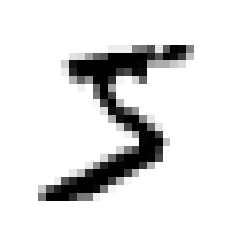

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mnist.data[0].reshape((28,28)),
           cmap=plt.cm.binary,
           interpolation="nearest")
plt.axis('off')
plt.show()

In [12]:
import numpy as np
a = np.ones((2,3))
b = np.zeros((2,4))
#c = np.concatenate([a, b], axis=1)
c = np.c_[a, b]
print(a)
print(b)
print(c)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0.]]


In [14]:
import numpy as np
a = np.ones((2,3))
b = np.zeros((4,3))
c = np.concatenate([a, b], axis=0)
c = np.r_[a, b]
print(a)
print(b)
print(c)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [17]:
instances = mnist.data[:100]
print(instances.shape) # (100,784)

(100, 784)


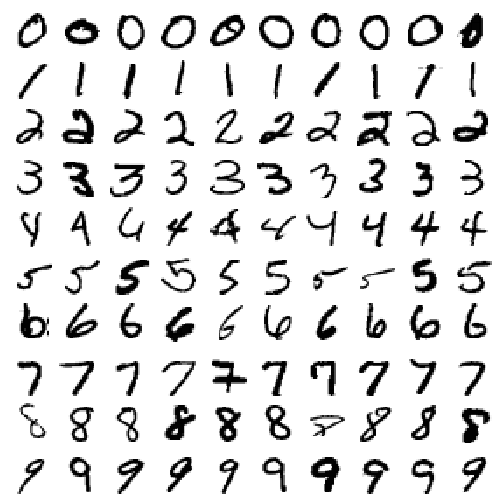

In [35]:
#instances = mnist.data[:100]
X = mnist.data
instances = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
#instances = instances[:7]
#instances = instances[:-3]
images = [instance.reshape((28,28)) for instance in instances]
row_images = []
for row in range(10):
    ten_imgs = images[row * 10 : (row + 1) * 10]
    row_images.append(np.concatenate(ten_imgs, axis=1))
image = np.concatenate(row_images, axis=0)

plt.figure(figsize=(9,9))
plt.imshow(image, cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [32]:
import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

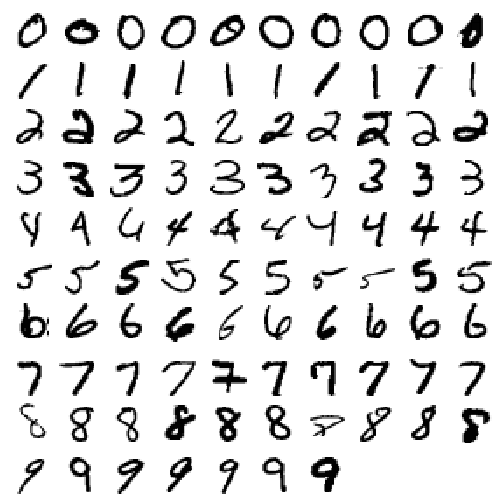

In [36]:
plt.figure(figsize=(9,9))
images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(images[:-3], images_per_row=10)
plt.show()